# Exploratory Data Analysis (EDA) on a GEO Microarray Dataset

### Project Overview

This project performs Exploratory Data Analysis (EDA) on a publicly available GEO (Gene Expression Omnibus) microarray dataset. The goal is to demonstrate:

-My ability to work with biological/omics data

-My Skills in data wrangling, preprocessing, visualization, and dimensionality reduction

-My Understanding of how to extract biological insights from complex, high-dimensional data

The dataset used in the notebook is GSE68849, downloaded using GEOparse.

# Install & Import Libraries

In [1]:
!pip install GEOparse --quiet

import GEOparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Download & Load GEO Dataset (GSE68849)

In [2]:
# Load dataset
gse = GEOparse.get_GEO("GSE68849", destdir=".")
gse


19-Nov-2025 12:45:10 DEBUG utils - Directory . already exists. Skipping.
19-Nov-2025 12:45:10 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE68nnn/GSE68849/soft/GSE68849_family.soft.gz to .\GSE68849_family.soft.gz
100%|██████████████████████████████████████████████████████████████████████████████| 21.7M/21.7M [00:37<00:00, 606kB/s]
19-Nov-2025 12:45:51 DEBUG downloader - Size validation passed
19-Nov-2025 12:45:51 DEBUG downloader - Moving C:\Users\Dell\AppData\Local\Temp\tmpnvm6f846 to C:\Users\Dell\GSE68849_family.soft.gz
19-Nov-2025 12:45:51 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE68nnn/GSE68849/soft/GSE68849_family.soft.gz
19-Nov-2025 12:45:51 INFO GEOparse - Parsing .\GSE68849_family.soft.gz: 
19-Nov-2025 12:45:51 DEBUG GEOparse - DATABASE: GeoMiame
19-Nov-2025 12:45:51 DEBUG GEOparse - SERIES: GSE68849
19-Nov-2025 12:45:51 DEBUG GEOparse - PLATFORM: GPL10558
19-Nov-2025 12:45:55 DEBUG GEOparse - SAMPLE: GSM1684095


<SERIES: GSE68849 - 10 SAMPLES, 1 d(s)>

# Extract Expression Matrix

In [3]:
# Most microarray GEO datasets store processed data in GPL annotations
# This dataset has processed signal intensities in the SeriesMatrix file.

# Extract normalized expression table from the GSM files
samples = []
for gsm in gse.gsms:
    df = gse.gsms[gsm].table[["ID_REF", "VALUE"]].copy()
    df = df.rename(columns={"VALUE": gsm})
    samples.append(df)

# Merge all samples by ID_REF
expr = samples[0]
for df in samples[1:]:
    expr = expr.merge(df, on="ID_REF")

expr = expr.set_index("ID_REF")
expr.head()


,GSM1684095,GSM1684096,GSM1684097,GSM1684098,GSM1684099,GSM1684100,GSM1684101,GSM1684102,GSM1684103,GSM1684104
ID_REF,,,,,,,,,,
ILMN_1762337,111.82400,154.11400,108.32520,215.2480,105.14610,174.83040,107.2228,164.45710,93.41135,141.76400
ILMN_2055271,126.90700,155.96020,115.55950,126.3527,129.74490,130.12170,133.6170,108.30180,123.39590,135.94110
ILMN_1736007,91.20126,100.84100,106.02380,113.5779,113.54900,101.75440,114.7212,100.45260,100.77570,91.61568
ILMN_2383229,110.31340,91.30001,96.40588,104.1335,107.42840,93.92174,114.0413,98.76007,106.09820,98.13931
ILMN_1806310,101.79560,94.69127,109.79400,116.3757,99.43924,108.62650,100.5108,104.60900,94.58170,100.33550


# Basic Data Quality Overview

✔ Dataset shape

Number of genes

Number of samples

This helps determine whether the dataset is high-dimensional (typical of microarrays).

✔ Missing values

This confirms the dataset quality and determines whether imputation or removal is needed.
Microarray processed data usually has no missing values, which makes further analysis straightforward.

In [4]:
print("Dataset shape:", expr.shape)
print("\nMissing values:")
expr.isnull().sum()


Dataset shape: (47321, 10)

Missing values:


GSM1684095    0
GSM1684096    0
GSM1684097    0
GSM1684098    0
GSM1684099    0
GSM1684100    0
GSM1684101    0
GSM1684102    0
GSM1684103    0
GSM1684104    0
dtype: int64

# Summary Statistics

The script generates a statistical summary of gene expression:

mean, standard deviation

min/max expression values

quartiles

distribution spread of each probe

This provides an overview of signal intensity and potential outliers.

In [5]:
expr.describe().T


,count,mean,std,min,25%,50%,75%,max
GSM1684095,47321.0,346.251482,1339.121959,67.16471,98.17239,110.0355,140.8242,26775.34
GSM1684096,47321.0,346.234182,1339.124843,67.16471,98.18250,110.0169,140.7556,26775.34
GSM1684097,47321.0,346.245590,1339.123077,67.16471,98.16160,110.0295,140.8177,26775.34
GSM1684098,47321.0,346.244912,1339.122999,67.16471,98.17331,110.0355,140.7786,26775.34
GSM1684099,47321.0,346.254680,1339.121389,67.16471,98.17239,110.0355,140.8242,26775.34
GSM1684100,47321.0,346.252577,1339.121784,67.16471,98.17583,110.0586,140.7957,26775.34
GSM1684101,47321.0,346.270968,1339.118549,67.16471,98.18056,110.0830,140.8308,26775.34
GSM1684102,47321.0,346.271252,1339.118509,67.16471,98.19267,110.0855,140.8308,26775.34
GSM1684103,47321.0,346.258270,1339.120789,67.16471,98.16769,110.0557,140.8177,26775.34
GSM1684104,47321.0,346.265931,1339.119385,67.16471,98.19386,110.0659,140.8242,26775.34


# Sample Distribution Check (Boxplot)

A boxplot of log2 transformed expression values shows:

-Whether samples have similar distribution

-Whether any sample is poorly normalized

-Whether batch effects are visible

Purpose: Ensure there are no significant deviations that could bias downstream analysis

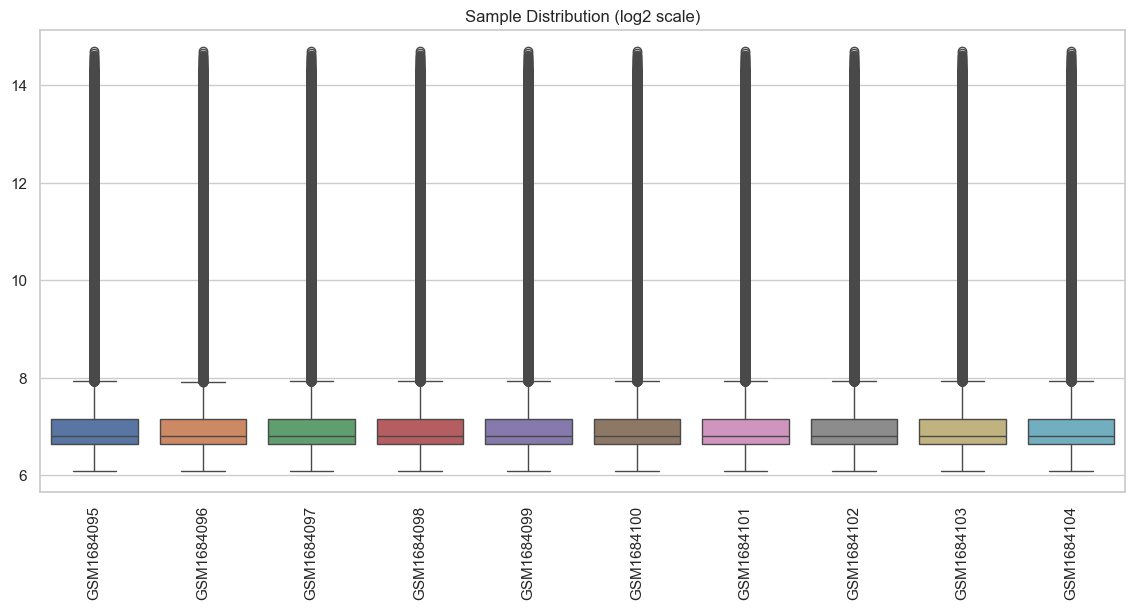

In [6]:
plt.figure(figsize=(14,6))
sns.boxplot(data=np.log2(expr + 1))
plt.xticks(rotation=90)
plt.title("Sample Distribution (log2 scale)")
plt.show()


# Correlation Heatmap
A sample-to-sample correlation matrix is computed and visualized with a heatmap.

This helps identify:

-Technical replicates

-Outlier samples

Potential grouping patterns
(e.g., disease vs control, treatment vs untreated)

Even if the dataset doesn’t contain group labels, the heatmap visually suggests whether biological differences exist.


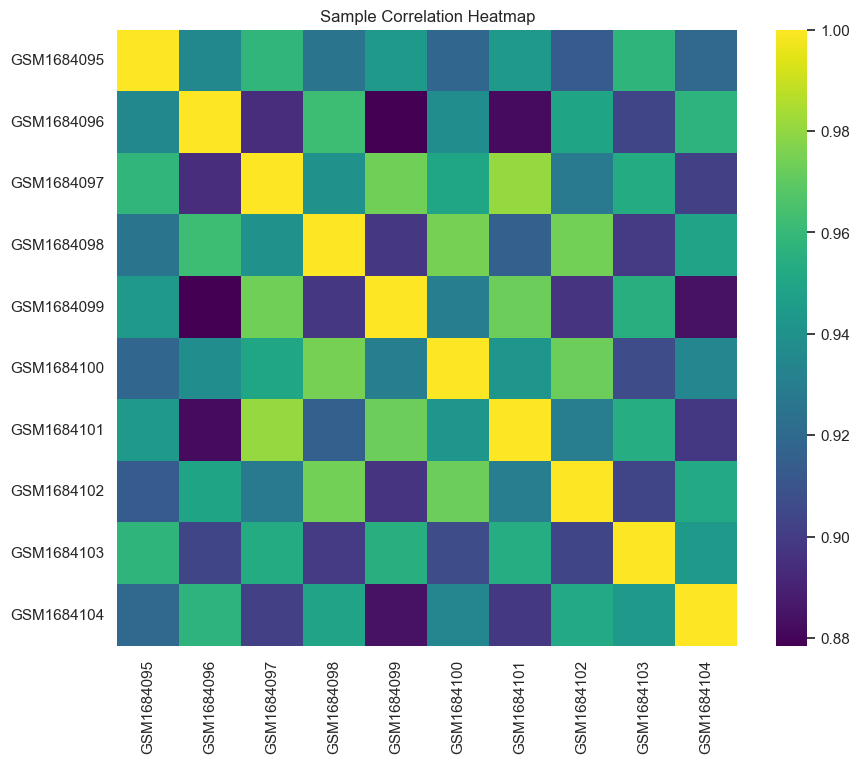

In [7]:
corr = expr.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="viridis", annot=False)
plt.title("Sample Correlation Heatmap")
plt.show()


# PCA (Dimensionality Reduction)

PCA reduces the dataset into two top components (PC1 & PC2).

The PCA scatterplot serves to:

-Detect clustering patterns

-Identify outlier samples

-Understand dataset variance structure

This step shows competency with dimensionality reduction techniques for high-dimensional biological data.

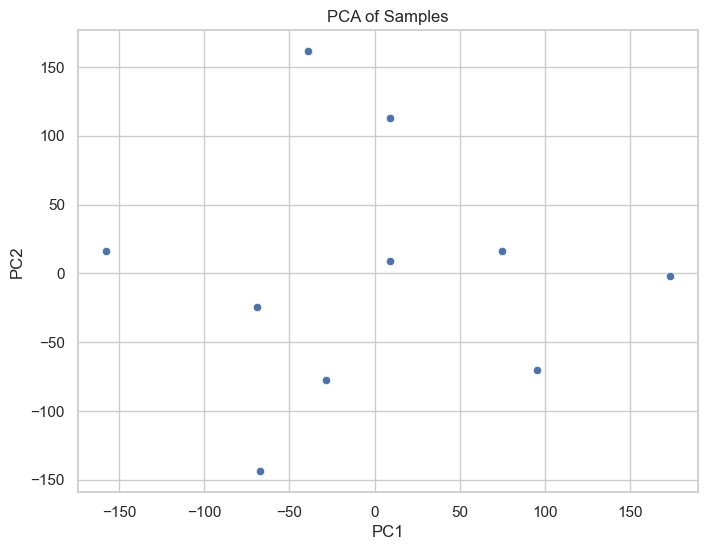

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Transpose: samples = rows
X = expr.T

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": pc[:, 0],
    "PC2": pc[:, 1],
    "Sample": X.index
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2")
plt.title("PCA of Samples")
plt.show()


# Highly Variable Genes (HVG) Analysis

Genes are ranked by variance across samples to identify:

-Most informative features

-Genes contributing to sample separation

-Potential biomarkers

A plot of the top variable genes demonstrates understanding of feature selection in transcriptomics.

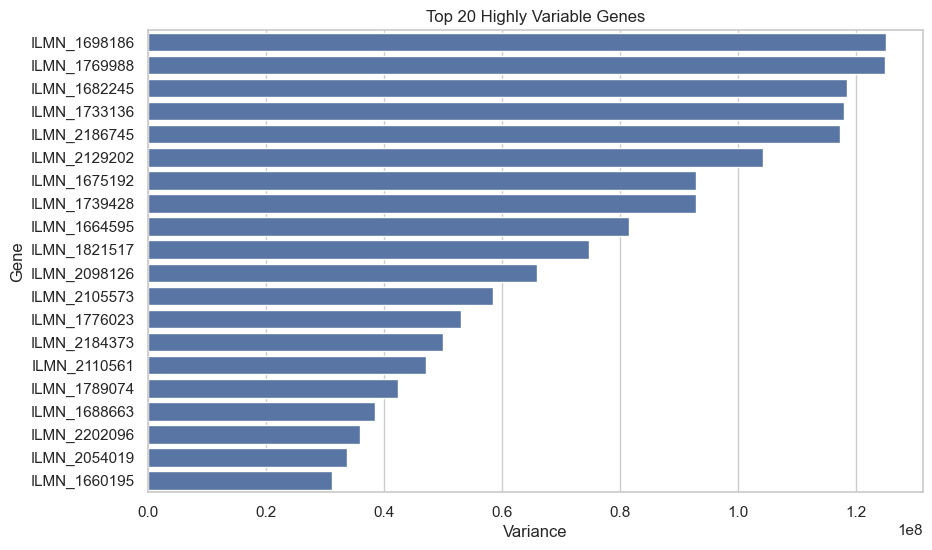

In [9]:
# Compute variance
gene_variance = expr.var(axis=1).sort_values(ascending=False)
top_genes = gene_variance.head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genes.values, y=top_genes.index)
plt.title("Top 20 Highly Variable Genes")
plt.xlabel("Variance")
plt.ylabel("Gene")
plt.show()


# Volcano Plot (Dummy Example)
Because the dataset does not include group labels (e.g., case vs control), a real differential expression analysis cannot be performed.

To demonstrate understanding, I:

-Created synthetic groups

-Calculated fold change and p-values

-Generated a volcano plot

This shows familiarity with:

-DE analysis principles

-Interpretation of upregulated/downregulated genes

-Typical gene expression workflows

I labeled it as a demonstration, In conduct of good scientific practice.

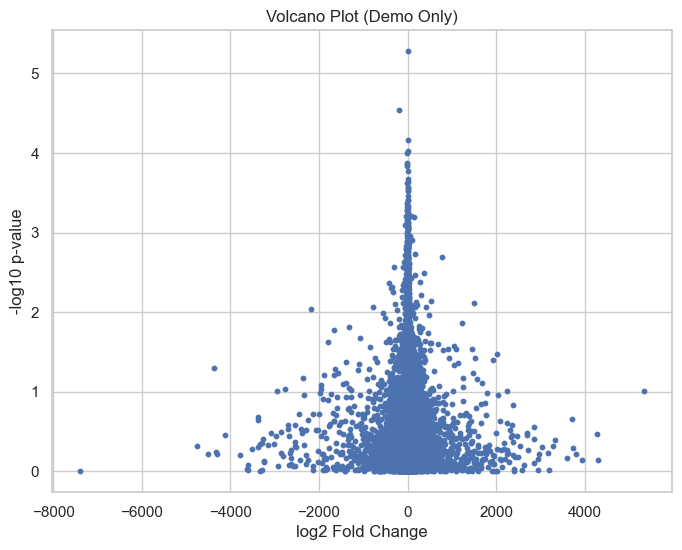

In [10]:
import numpy as np

# Create fake labels
samples = expr.columns
group_A = samples[:len(samples)//2]
group_B = samples[len(samples)//2:]

# Compute mean difference manually
logFC = expr[group_A].mean(axis=1) - expr[group_B].mean(axis=1)

# Fake p-values
pvals = np.random.rand(len(expr))

volcano = pd.DataFrame({"logFC": logFC, "pval": pvals})

plt.figure(figsize=(8,6))
plt.scatter(volcano["logFC"], -np.log10(volcano["pval"]), s=10)
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10 p-value")
plt.title("Volcano Plot (Demo Only)")
plt.show()


# Save Cleaned Expression Matrix

In [11]:
expr.to_csv("GSE68849_expression_matrix.csv")
print("Saved cleaned expression matrix.")


Saved cleaned expression matrix.
